In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

track_df = pd.read_csv("Track_List.csv") #get data frame for tracks
track_df.columns #get attributes for tracks

Index(['Title', 'Time', 'Artist', 'Date Added', 'Plays', 'Last Played',
       'Skips', 'Last Skipped'],
      dtype='object')

In [2]:
track_df.head()

,Title,Time,Artist,Date Added,Plays,Last Played,Skips,Last Skipped
0,The Long Run,3:43,Eagles,1/26/2019,595,2/19/2021,13,1/26/2021
1,Over The Hills And Far Away,4:50,Led Zeppelin,4/1/2019,464,12/26/2020,5,1/3/2021
2,In The Flesh?,3:21,Pink Floyd,1/10/2020,428,2/19/2021,6,11/29/2020
3,The Song Remains The Same,5:30,Led Zeppelin,4/1/2019,394,2/17/2021,16,12/19/2020
4,Take The Money And Run,2:50,Steve Miller Band,4/1/2019,374,2/18/2021,1,01/01/1000


In [3]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 8 columns):
Title           412 non-null object
Time            412 non-null object
Artist          412 non-null object
Date Added      412 non-null object
Plays           412 non-null int64
Last Played     412 non-null object
Skips           412 non-null int64
Last Skipped    412 non-null object
dtypes: int64(2), object(6)
memory usage: 25.9+ KB


In [4]:
track_df.describe()

,Plays,Skips
count,412.000000,412.000000
mean,60.961165,7.703883
std,83.545628,5.142229
min,0.000000,1.000000
25%,9.000000,4.000000
50%,26.000000,7.000000
75%,77.250000,10.000000
max,595.000000,40.000000


In [5]:
track_df['Play-to-Skip Ratio'] = track_df['Plays'] / track_df['Skips']
track_df.head(10)

,Title,Time,Artist,Date Added,Plays,Last Played,Skips,Last Skipped,Play-to-Skip Ratio
0,The Long Run,3:43,Eagles,1/26/2019,595,2/19/2021,13,1/26/2021,45.769231
1,Over The Hills And Far Away,4:50,Led Zeppelin,4/1/2019,464,12/26/2020,5,1/3/2021,92.800000
2,In The Flesh?,3:21,Pink Floyd,1/10/2020,428,2/19/2021,6,11/29/2020,71.333333
3,The Song Remains The Same,5:30,Led Zeppelin,4/1/2019,394,2/17/2021,16,12/19/2020,24.625000
4,Take The Money And Run,2:50,Steve Miller Band,4/1/2019,374,2/18/2021,1,01/01/1000,374.000000
5,Keep That Same Old Feeling,5:38,The Crusaders,6/9/2020,342,2/19/2021,1,2/6/2021,342.000000
6,In The City,3:45,Eagles,1/26/2019,342,2/17/2021,4,5/20/2020,85.500000
7,Travelling Riverside Blues,5:12,Led Zeppelin,2/22/2019,334,1/10/2021,11,11/28/2020,30.363636
8,Fool In The Rain,6:11,Led Zeppelin,4/1/2019,319,12/23/2020,8,6/2/2020,39.875000
9,Stir It Up (live The Old Grey Whistle Test 1973),3:53,The Wailers,8/4/2019,292,2/21/2021,7,2/18/2021,41.714286


In [6]:
track_df.describe()

,Plays,Skips,Play-to-Skip Ratio
count,412.000000,412.000000,412.000000
mean,60.961165,7.703883,14.793053
std,83.545628,5.142229,34.999139
min,0.000000,1.000000,0.000000
25%,9.000000,4.000000,1.351190
50%,26.000000,7.000000,4.379808
75%,77.250000,10.000000,14.681818
max,595.000000,40.000000,374.000000


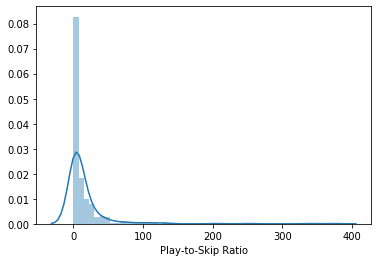

In [7]:
sns.distplot(track_df['Play-to-Skip Ratio'])

In [8]:
from scipy.stats import skew
skew(track_df['Play-to-Skip Ratio'])

6.369399779607103

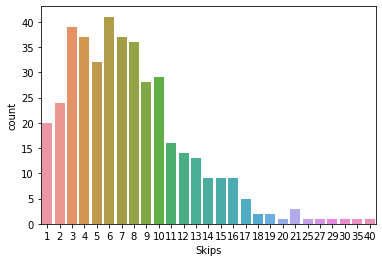

In [9]:
sns.countplot(track_df['Skips'])

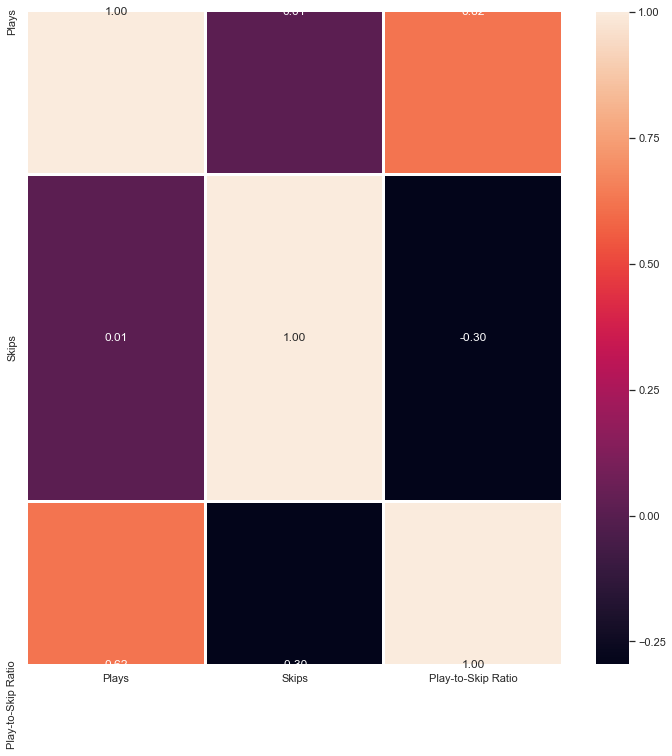

In [10]:
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(track_df.corr(), annot=True, fmt='.2f', linewidth=2)

In [11]:
#songs I skip (within first 20 sec) more than I play in full
least_liked = track_df.loc[track_df['Play-to-Skip Ratio'] < 1] 
least_liked.head(10)

,Title,Time,Artist,Date Added,Plays,Last Played,Skips,Last Skipped,Play-to-Skip Ratio
243,Goodbye Blue Sky,2:47,Pink Floyd,1/10/2020,19,12/14/2020,30,12/28/2020,0.633333
246,Affirmation,6:59,George Benson,6/4/2020,18,2/18/2021,21,12/26/2020,0.857143
259,Don't Leave Me Now,4:16,Pink Floyd,1/10/2020,16,11/11/2020,25,12/14/2020,0.640000
289,Goodbye Cruel World,1:18,Pink Floyd,1/10/2020,12,3/17/2020,13,12/22/2020,0.923077
290,Gimme All Your Lovin',4:00,ZZ Top,9/11/2019,12,12/10/2020,14,11/15/2020,0.857143
299,Walk Away,3:34,The James Gang,3/14/2019,10,2/17/2021,12,1/3/2021,0.833333
311,Empty Spaces,2:08,Pink Floyd,1/10/2020,9,5/13/2020,12,12/14/2020,0.750000
315,Get Up Stand Up,3:22,Bob Marley,4/3/2019,8,2/17/2021,12,12/28/2020,0.666667
317,Old Alabama,4:32,Brad Paisley,1/26/2019,8,9/23/2020,11,12/28/2020,0.727273
325,Could You Be Loved,4:00,Bob Marley,4/3/2019,7,12/10/2020,9,1/1/2021,0.777778


In [12]:
#song I play 50X (or more) than I skip (within first 20 sec)
most_liked = track_df.loc[track_df['Play-to-Skip Ratio'] >= 50] 
most_liked.head(10)

,Title,Time,Artist,Date Added,Plays,Last Played,Skips,Last Skipped,Play-to-Skip Ratio
1,Over The Hills And Far Away,4:50,Led Zeppelin,4/1/2019,464,12/26/2020,5,1/3/2021,92.800000
2,In The Flesh?,3:21,Pink Floyd,1/10/2020,428,2/19/2021,6,11/29/2020,71.333333
4,Take The Money And Run,2:50,Steve Miller Band,4/1/2019,374,2/18/2021,1,01/01/1000,374.000000
5,Keep That Same Old Feeling,5:38,The Crusaders,6/9/2020,342,2/19/2021,1,2/6/2021,342.000000
6,In The City,3:45,Eagles,1/26/2019,342,2/17/2021,4,5/20/2020,85.500000
14,Jet Airliner,4:27,Steve Miller Band,4/1/2019,270,2/21/2021,2,6/7/2020,135.000000
16,Closer to the Sun,2:26,Slightly Stoopid,5/20/2020,257,2/18/2021,2,7/2/2020,128.500000
17,Real Situation (1991),3:08,Bob Marley & The Wailers,8/2/2020,257,2/21/2021,2,11/20/2020,128.500000
18,Get Down On It,4:36,Kool & The Gang,6/4/2020,253,2/17/2021,1,12/17/2020,253.000000
23,Rock'n Me,3:08,Steve Miller Band,4/1/2019,226,2/17/2021,2,6/7/2020,113.000000
